### Import libraries

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import numpy as np

### Customize

In [6]:
# Specify file names
past_data_path = '0511 Decision tree past data simple.csv'
#new_data_path = 'Decision tree new data.csv'
tree_image_path = "0511 decision_tree.png"
rules_file_path = "0511 decision_rules.txt"

# Explicitly define features and target
features = ['Age', 'Income', 'Gender']
target = 'Purchase'

### Load and clean past data

In [7]:
# Load past data 
past_data = pd.read_csv(past_data_path)
print("Past Data Columns:", past_data.columns.tolist())  # Debugging line

# Drop unnamed columns if they exist
past_data = past_data.loc[:, ~past_data.columns.str.contains('^Unnamed')]

# Ensure Age and Income are numeric
past_data['Age'] = pd.to_numeric(past_data['Age'], errors='coerce')
past_data['Income'] = pd.to_numeric(past_data['Income'], errors='coerce')

# Encode categorical variable (Gender)
label_encoders = {}
if past_data['Gender'].dtype == 'object':
    le = LabelEncoder()
    past_data['Gender'] = le.fit_transform(past_data['Gender'])
    label_encoders['Gender'] = le
    print("Recognized Gender Classes in Past Data:", le.classes_)  # Debugging line

# Drop rows with missing values after conversions
past_data = past_data.dropna()

Past Data Columns: ['Cust_id', 'Age', 'Income', 'Gender', 'Purchase']


### Train and save Decision Tree and decision rules

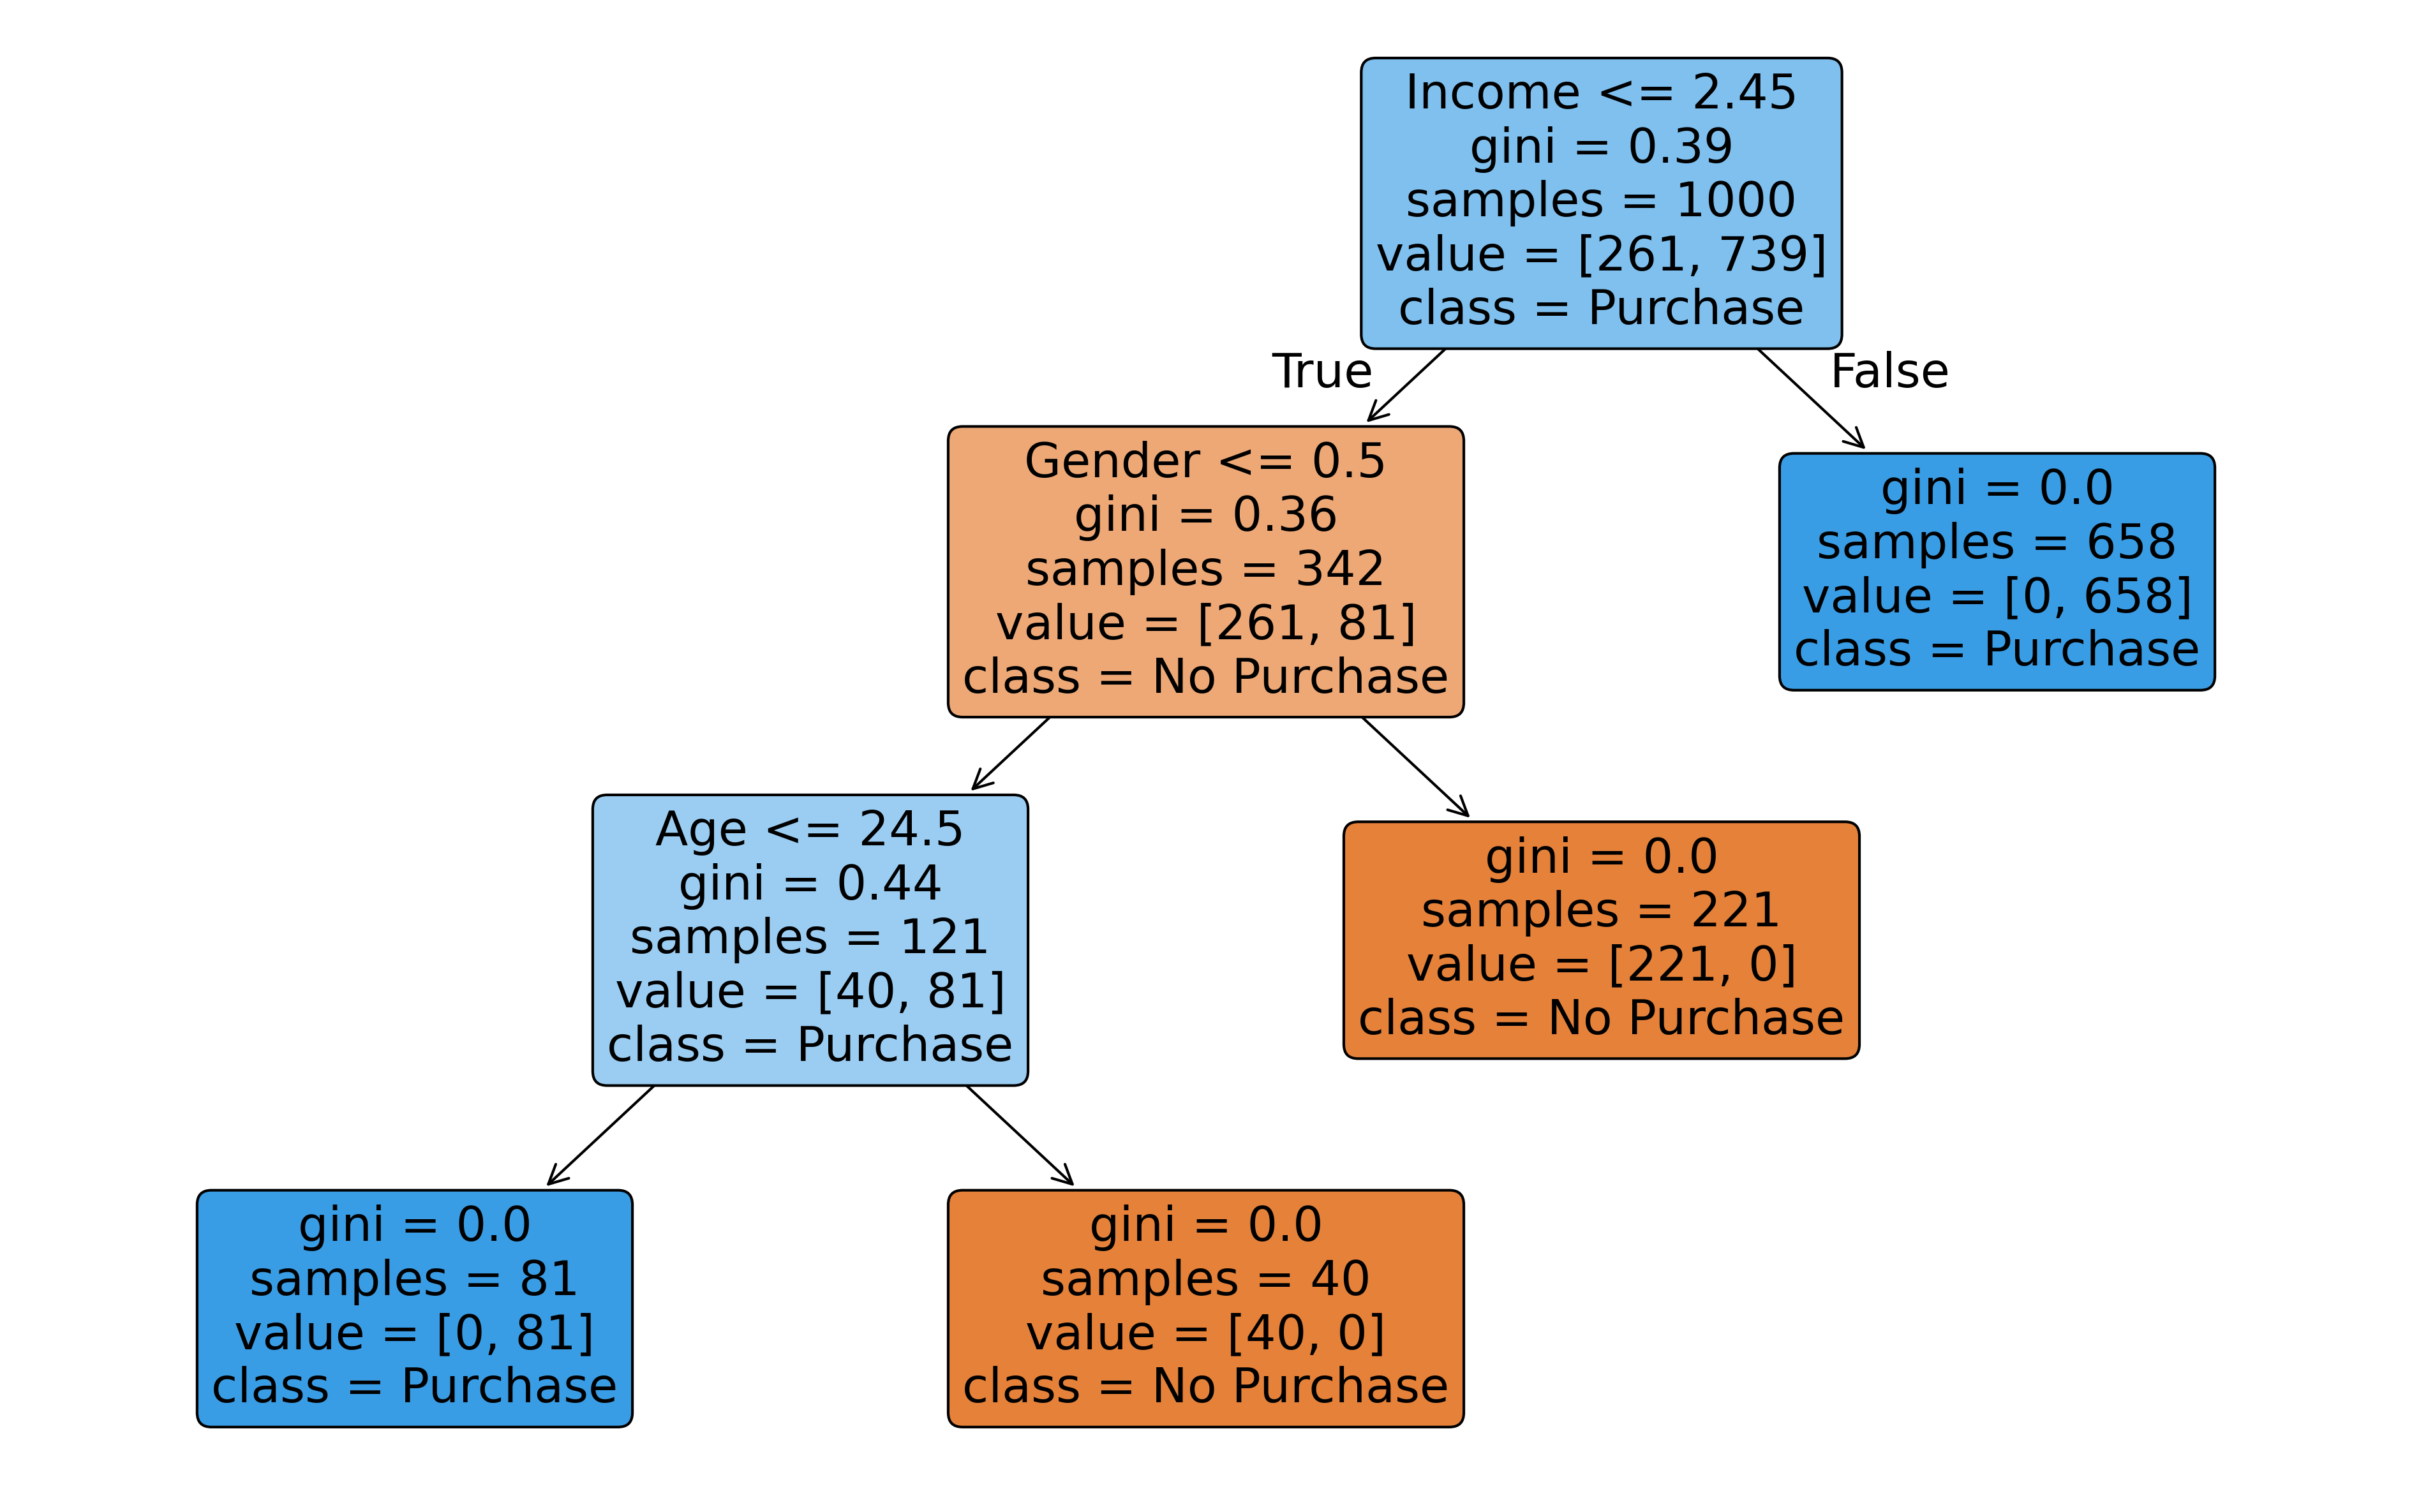

Decision tree diagram saved to 0511 decision_tree.png
Decision rules saved to 0511 decision_rules.txt


In [9]:
# Train Decision Tree
X_train = past_data[features]
y_train = past_data[target]
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Save decision tree diagram 
plt.figure(figsize=(16, 10), dpi=300)
plot_tree(dt_model, feature_names=features, class_names=["No Purchase", "Purchase"], filled=True, fontsize=18, rounded=True, precision=2)
plt.savefig(tree_image_path, bbox_inches='tight')
plt.show()
plt.close()
print(f"Decision tree diagram saved to {tree_image_path}")

# Convert decision rules to plain English
def explain_decision_tree(rules):
    lines = rules.split("\n")
    explanation = []
    for line in lines:
        depth = line.count("|")
        condition = line.split("-")[-1].strip()
        if "class" in condition:
            explanation.append("  " * depth + f"THEN the decision is: {condition.replace('class:', '').strip()}")
        else:
            explanation.append("  " * depth + f"IF {condition}")
    return "\n".join(explanation)

rules = export_text(dt_model, feature_names=features, spacing=3)
plain_english_rules = explain_decision_tree(rules)

# Save decision rules in plain English to a file
with open(rules_file_path, "w") as f:
    f.write(plain_english_rules)
print(f"Decision rules saved to {rules_file_path}")